First 5 rows of the dataset:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act

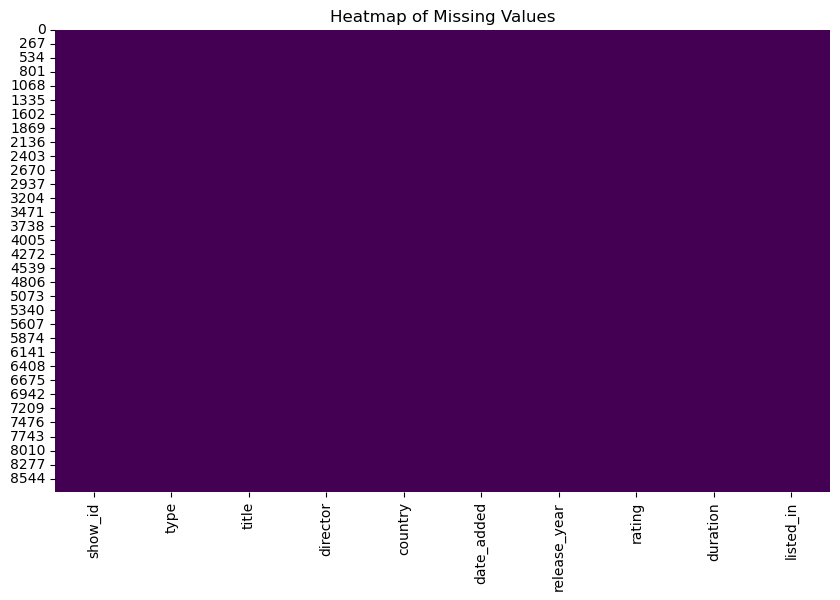

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/dhanushadurukatla/Downloads/netflix1.csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a summary of the dataset, including missing values
print("\n--- Dataset Info ---")
df.info()

# Get the count of null values in each column
print("\n--- Count of Missing Values ---")
print(df.isnull().sum())

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [3]:
# Display the value counts for the 'rating' column
print("Value counts for the 'rating' column:")
print(df['rating'].value_counts())

Value counts for the 'rating' column:
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


In [4]:
# Fill missing 'rating' values with the mode ('TV-MA')
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Verify that there are no more missing values in 'rating'
print("\nMissing values in 'rating' after filling:")
print(df['rating'].isnull().sum())


Missing values in 'rating' after filling:
0


In [5]:
# Fill missing 'director' values
df['director'].fillna('No Director Specified', inplace=True)

# Verify the changes
print("\nMissing values in 'director' after filling:")
print(df['director'].isnull().sum())


Missing values in 'director' after filling:
0


In [8]:
# Fill missing 'country' values with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Verify the changes
print("\nMissing values in 'country' after filling:")
print(df[['country']].isnull().sum())


Missing values in 'country' after filling:
country    0
dtype: int64


In [7]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [9]:
# Display the number of missing 'date_added' rows before dropping
print(f"Number of rows with missing 'date_added' before dropping: {df['date_added'].isnull().sum()}")

# Drop rows where 'date_added' is null
df.dropna(subset=['date_added'], inplace=True)

# Verify that there are no more missing values
print(f"Number of rows with missing 'date_added' after dropping: {df['date_added'].isnull().sum()}")

Number of rows with missing 'date_added' before dropping: 0
Number of rows with missing 'date_added' after dropping: 0


In [10]:
# Convert 'date_added' to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])

# Create new columns for 'year_added' and 'month_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Display the first 5 rows to see the new columns
print("\nFirst 5 rows with new 'year_added' and 'month_added' columns:")
print(df.head())


First 5 rows with new 'year_added' and 'month_added' columns:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  year_added  month_added  
0                                      Docume

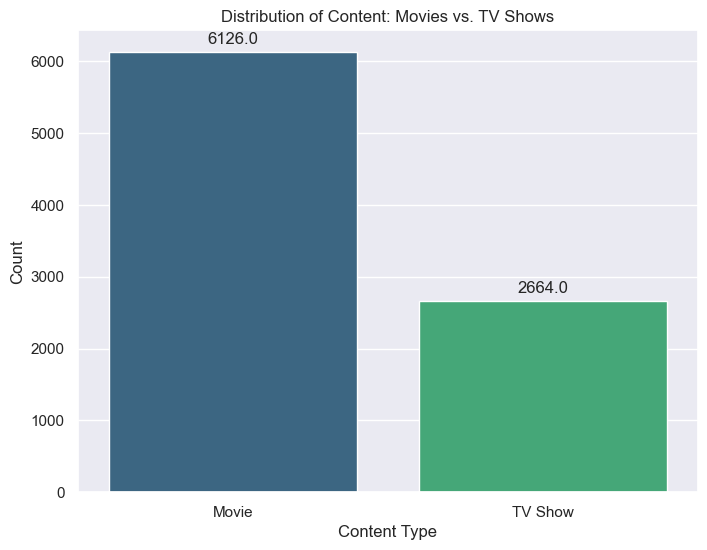

In [11]:
# Set the style for the plots
sns.set(style="darkgrid")

# Create a count plot of the 'type' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=df, palette='viridis', order=df['type'].value_counts().index)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Distribution of Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

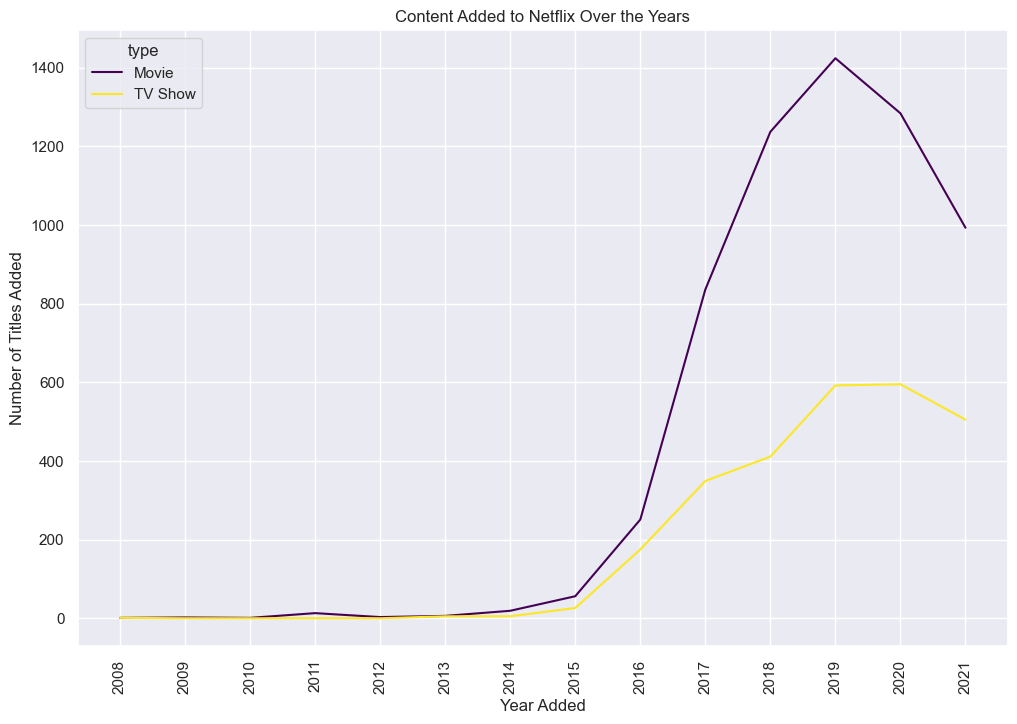

In [12]:
# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Group by year and content type and count the number of titles
content_by_year = df.groupby('year_added')['type'].value_counts().unstack().fillna(0)

# Create the line plot
content_by_year.plot(kind='line', figsize=(12, 8), colormap='viridis')

plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(np.arange(min(content_by_year.index), max(content_by_year.index)+1, 1))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Top 15 Genres on Netflix:
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  573
Crime TV Shows               469
Kids' TV                     448
Docuseries                   394
dtype: int64


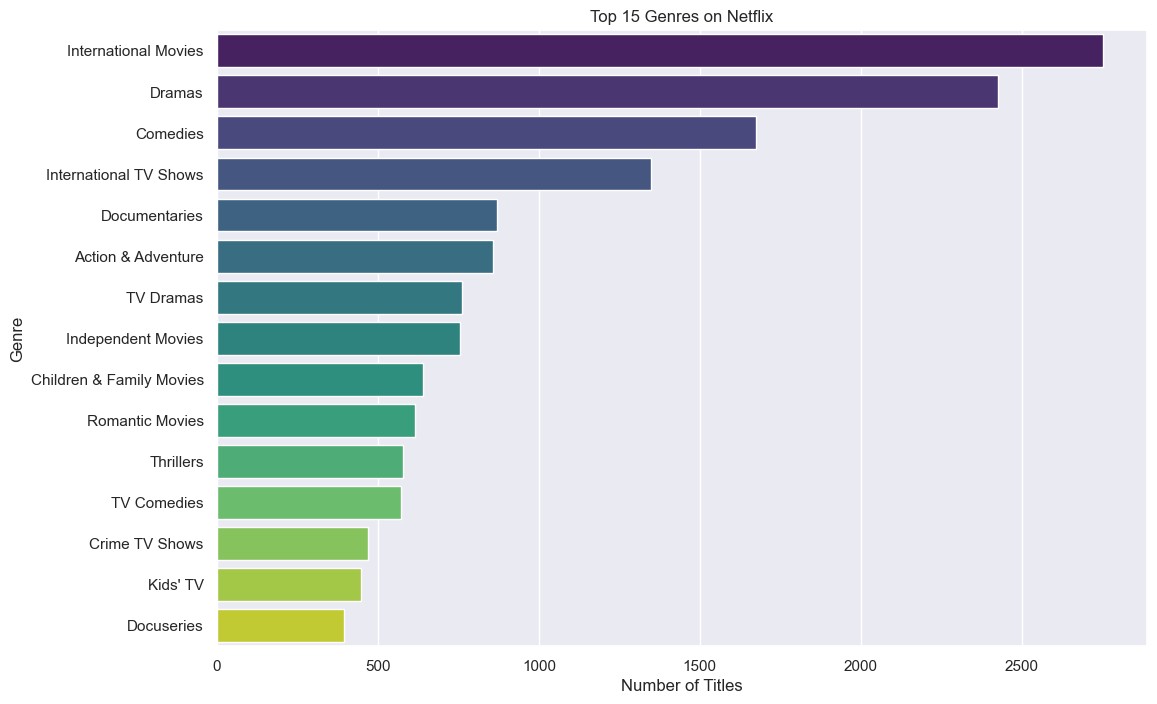

In [13]:
# Create a new series by splitting the 'listed_in' column, which contains genres
# The stack() method unnests the list of genres into separate rows
genres = df['listed_in'].str.split(', ', expand=True).stack()

# Get the counts of each genre
top_genres = genres.value_counts()

# Select the top 15 genres
top_15_genres = top_genres.head(15)

print("Top 15 Genres on Netflix:")
print(top_15_genres)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_genres.values, y=top_15_genres.index, palette='viridis', orient='h')

plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

Top 15 Content Producing Countries on Netflix:
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
dtype: int64


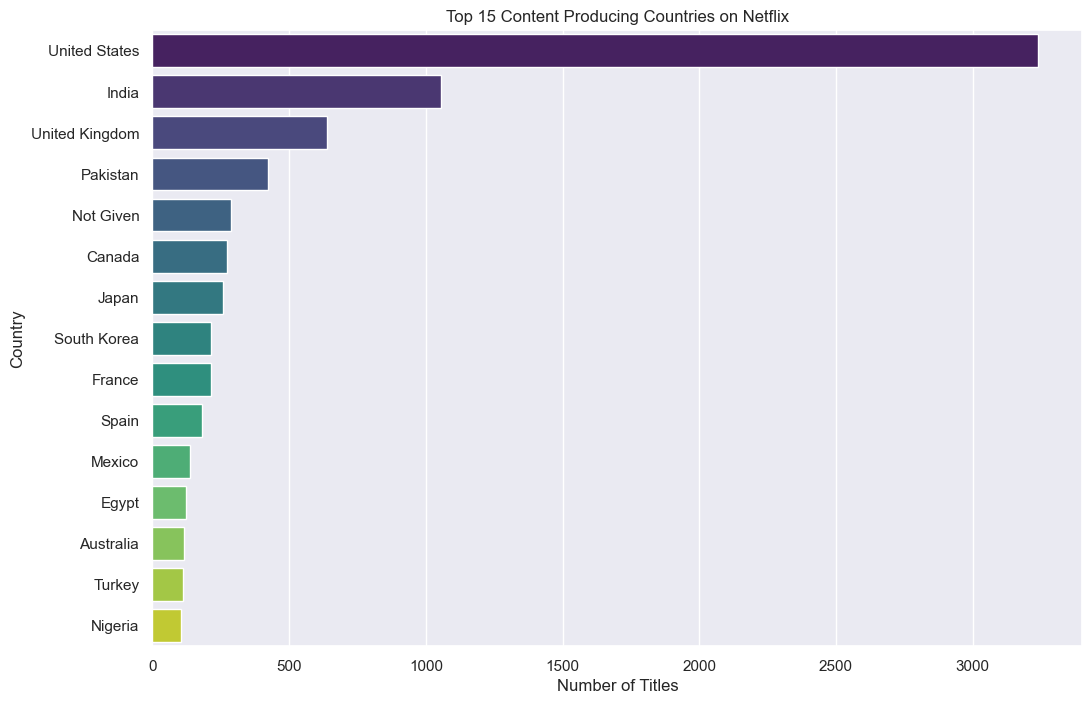

In [14]:
# Create a new series by splitting the 'country' column
# and unnesting the list of countries into separate rows
countries = df['country'].str.split(', ', expand=True).stack()

# Get the counts of each country
top_countries = countries.value_counts()

# Select the top 15 countries
top_15_countries = top_countries.head(15)

print("Top 15 Content Producing Countries on Netflix:")
print(top_15_countries)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette='viridis', orient='h')

plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

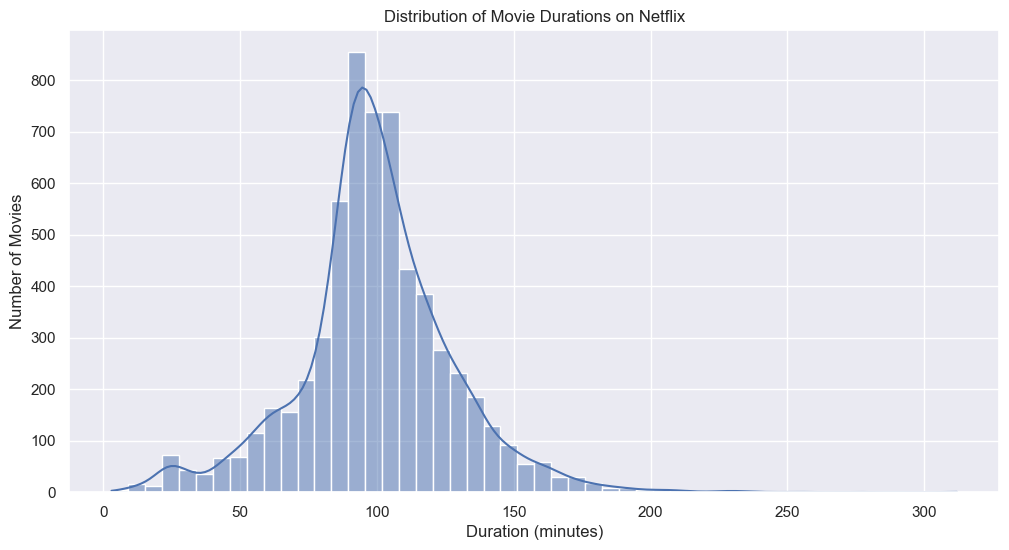

In [15]:
# Filter the DataFrame to get only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract the numeric part of the 'duration' column and convert it to an integer
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Create a distribution plot for movie durations
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_min'], kde=True, bins=50)

plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

Top 10 TV Show Season Counts:
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
Name: duration, dtype: int64


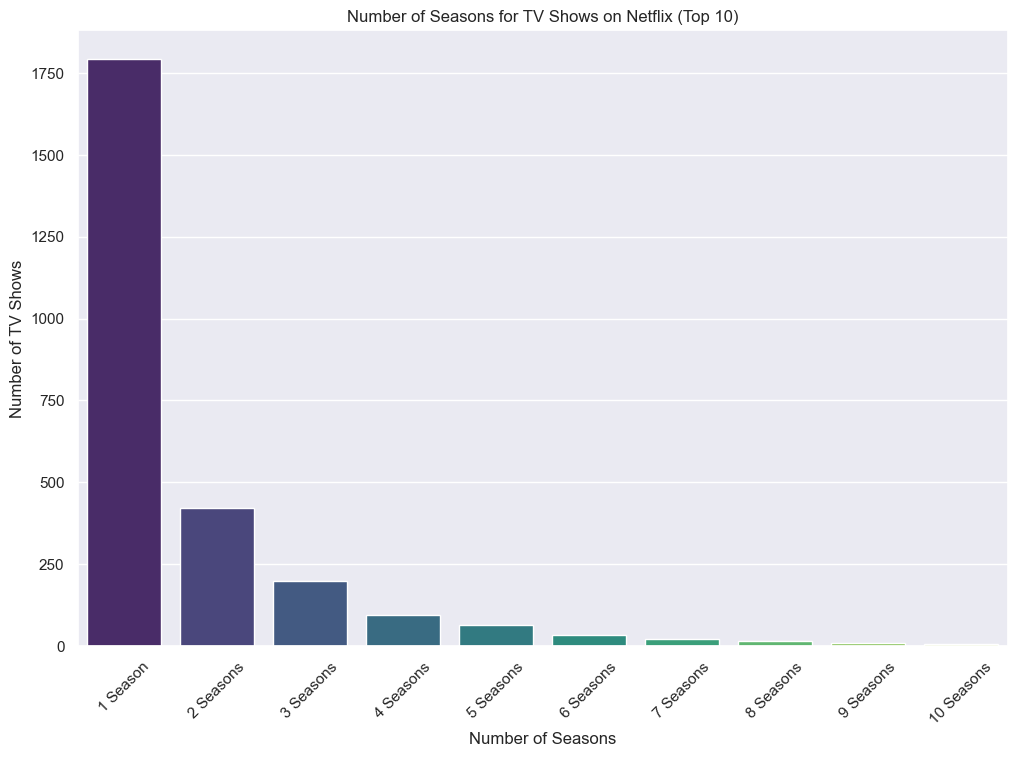

In [16]:
# Filter the DataFrame to get only TV Shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Get the counts of shows by the number of seasons
season_counts = tv_shows_df['duration'].value_counts().head(10) # Top 10 for clarity

print("Top 10 TV Show Season Counts:")
print(season_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')

plt.title('Number of Seasons for TV Shows on Netflix (Top 10)')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Data Preparation ---

# Load and clean the dataset
df = pd.read_csv('/Users/dhanushadurukatla/Downloads/netflix1.csv')
df.dropna(subset=['date_added'], inplace=True)
text_features = ['director', 'country', 'listed_in']
for feature in text_features:
    df[feature].fillna('Unknown', inplace=True)

# Combine the text features into a single input string for the model
df['combined_features'] = df['director'] + ' ' + df['country'] + ' ' + df['listed_in']

# Define our features (X) and the target (y)
X = df['combined_features']
y = df['type']

# --- 2. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Create and Train the Pipeline ---
# The pipeline first converts text to numerical vectors (TF-IDF), then applies the classifier.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear'))
])

print("Training the classification model...")
pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 4. Evaluate the Model ---
print("\n--- Classification Model Evaluation ---")
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the classification model...
Training complete.

--- Classification Model Evaluation ---
Model Accuracy: 99.49%

Classification Report:
              precision    recall  f1-score   support

       Movie       0.99      1.00      1.00      1225
     TV Show       1.00      0.98      0.99       533

    accuracy                           0.99      1758
   macro avg       1.00      0.99      0.99      1758
weighted avg       0.99      0.99      0.99      1758



In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- 1. Data Preparation ---
# We use the cleaned DataFrame 'df'
df_rec = df.copy()

# Ensure the 'listed_in' column has no missing values
df_rec['listed_in'].fillna('', inplace=True)

# --- 2. Feature Engineering using 'listed_in' (genres) ---
# Create a TF-IDF Matrix from the 'listed_in' column
# This matrix will represent the importance of each genre for each title
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_rec['listed_in'])

# --- 3. Calculate Similarity ---
# Calculate the cosine similarity based on the genre vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping from movie titles to their index number
indices = pd.Series(df_rec.index, index=df_rec['title']).drop_duplicates()

# --- 4. The Recommendation Function (no changes needed here) ---
def get_recommendations(title, cosine_sim=cosine_sim, indices=indices):
    # Get the index of the movie that matches the title
    try:
        idx = indices[title]
    except KeyError:
        return "Title not found in the dataset."

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_rec['title'].iloc[movie_indices]

# --- 5. Test the New Genre-Based Recommendation System ---
print("--- Genre-Based Recommendation System Example ---")

# Let's get recommendations for a title. The results will now be based on similar genres.
recommendations = get_recommendations('Peaky Blinders')
print("\nRecommendations for 'Peaky Blinders' (based on genre):")
print(recommendations)

recommendations_2 = get_recommendations('Stranger Things')
print("\nRecommendations for 'Stranger Things' (based on genre):")
print(recommendations_2)

--- Genre-Based Recommendation System Example ---

Recommendations for 'Peaky Blinders' (based on genre):
2665    Criminal: Spain
5353         London Spy
6679           Marcella
6829     The Irregulars
6844            The One
7083       Criminal: UK
7155           Get Even
7252        White Lines
7376       THE STRANGER
7394        Giri / Haji
Name: title, dtype: object

Recommendations for 'Stranger Things' (based on genre):
7446             Nightflyers
7633         Stranger Things
8485                   Helix
6613                Manifest
7751                  The OA
8122     The Vampire Diaries
8318                The 4400
8728          The Messengers
7157    The Umbrella Academy
7186             Warrior Nun
Name: title, dtype: object
